In [7]:
import coinmarketcappy as cmc
from cryptocmd import CmcScraper
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
% matplotlib inline


# Plot styles
plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')
plt.rcParams['axes.edgecolor'] = '#ffffff'
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'
plt.rcParams['patch.edgecolor'] = '#ffffff'
plt.rcParams['patch.facecolor'] = '#ffffff'
plt.rcParams['savefig.edgecolor'] = '#ffffff'
plt.rcParams['savefig.facecolor'] = '#ffffff'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


# Total Market Capitalization
market_cap = cmc.total_market_cap(exclude_btc=False)
market_cap_dict = {'Date':[], "Market Cap": []}
for value in market_cap['market_cap_by_available_supply']:
    market_cap_dict['Date'].append(value[0])
    market_cap_dict['Market Cap'].append(value[1])
    
market_cap_df = pd.DataFrame(market_cap_dict)
market_cap_df['Date'] = pd.to_datetime(market_cap_df['Date']).dt.date
market_cap_df = market_cap_df.set_index('Date')

# Read in historical data for every coin on CMC. CSV is generated by cryptomarketcap-historical-prices scraper
df = pd.read_csv('~/Desktop/coindata.csv')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

#Pivot the table and take only rows after June 22, 2016
df_pivot = df[df['Date'] > '2016-06-22'].pivot(index='Date', columns='Coin', values='Market Cap').sort_index()


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# Take the top 200 coins by market cap with at least 120 days of historical data
marketcap_coins = pd.DataFrame(df[df['Date']=='2018-06-20'].set_index('Coin')['Market Cap']).sort_values(by='Market Cap', ascending=False)

longer_than_120_coins = []

for coin in df_pivot.count().index:
    if df_pivot.count()[coin] > 120:
        longer_than_120_coins.append(coin)

marketcap_coins_longer_120 = marketcap_coins[marketcap_coins.index.isin(longer_than_120_coins)]

top_200_coins = []

for i in range(0,200):
    top_200_coins.append(marketcap_coins_longer_120.index[i])

In [9]:
# Function to get the market cap for the rest of the market
def calc_market_cap_minus_coin_corr(coin, df1, df2):
    temp_df = pd.DataFrame(df1[coin]).join(df2)
    temp_df['Market Cap'] = temp_df['Market Cap'] - temp_df[coin]
    return temp_df.corr()['Market Cap'][0]

df_dict = {}

for coin in top_200_coins:
    df_dict[coin] = calc_market_cap_minus_coin_corr(coin, df_pivot, market_cap_df)


[Text(0,0.5,'Density'), Text(0.5,0,'Correlation with the Rest of the Market')]

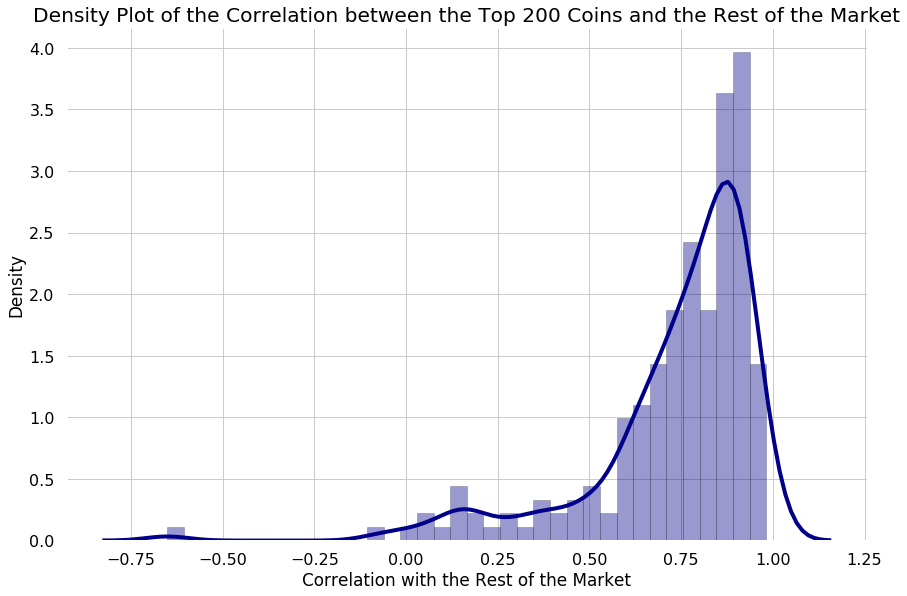

In [10]:
#Correlations DF
corr_to_market_cap = pd.DataFrame({'coins': df_dict}).sort_values('coins')

#Seaborn Distplot
ax = sns.distplot(corr_to_market_cap['coins'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#Graph titles and axes labels
plt.title('Density Plot of the Correlation between the Top 200 Coins and the Rest of the Market')
ax.set(xlabel='Correlation with the Rest of the Market', ylabel='Density')


In [22]:
# Coins least correlated with the rest of the market
corr_to_market_cap.columns=['Correlation to the Rest of the Market']
corr_to_market_cap[0:20]

,Bitcoin Market Cap,Rest of Market Cap
Date,,
2016-06-23,9.373190e+09,2.569410e+09
2016-06-24,9.816730e+09,2.768570e+09
2016-06-25,1.044200e+10,1.962800e+09
2016-06-26,1.045490e+10,1.638500e+09
2016-06-27,9.882840e+09,2.400160e+09
2016-06-28,1.033680e+10,1.990600e+09
2016-06-29,1.011960e+10,2.096600e+09
2016-06-30,1.006640e+10,2.677600e+09
2016-07-01,1.057060e+10,2.186400e+09
